In [13]:
!unzip archive.zip

Archive:  archive.zip
  inflating: creditcard.csv          


In [14]:
import numpy as np
import pandas as pd

data = pd.read_csv('creditcard.csv',delimiter = ',')

In [15]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [18]:
data[['Time','V1','V2','V27','V28','Amount','Class']].describe()

,Time,V1,V2,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
non_frauds, frauds = data.groupby("Class").size()

In [20]:
non_frauds

284315

In [21]:
frauds

492

In [22]:
frauds / (non_frauds + frauds) * 100

0.1727485630620034

In [24]:
non_frauds / (frauds + non_frauds) * 100

99.82725143693798

In [32]:
feature_columns = data.columns[:-1]
label_column = data.columns[-1]

features = data[feature_columns].values.astype('float32')
labels = (data[label_column].values).astype('float32')

In [33]:
features.shape

(284807, 30)

In [34]:
labels.shape

(284807,)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.1,random_state = 42)

In [38]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((256326, 30), (28481, 30), (256326,), (28481,))

In [39]:
from sagemaker import RandomCutForest

In [43]:
instance_type = 'ml.m5.large'
rcf = RandomCutForest(role = 'arn:aws:iam::544433795559:role/service-role/AmazonSageMaker-ExecutionRole-20230426T180700',
                      train_instance_type = instance_type,
                     train_instance_count = 1,
                     num_samples_per_tree = 512,
                     num_trees = 50)

In [44]:
rcf

In [45]:
rcf.fit(rcf.record_set(x_train))

2023-04-26 22:47:16 Starting - Starting the training job...
2023-04-26 22:47:32 Starting - Preparing the instances for training......
2023-04-26 22:48:17 Downloading - Downloading input data...
2023-04-26 22:48:47 Training - Downloading the training image.........
2023-04-26 22:50:48 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/26/2023 22:50:54 INFO 139652646061888] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'num_samples_per_tree': 256, 'num_trees': 100, 'force_dense': 'true', 'eval_metrics': ['accuracy', 'precision_recall_fscore'], 'epochs': 1, 'mini_batch_size': 1000, '_log_level': 'info', '_kvstore': 'dist_async', '_num_kv_servers': 'auto', '_num_gpus': 'auto', '_tuning_objective_metric': '', '_ftp_port': 8999}
[04/26/2023 22:50:54 INFO 139652646061888] Merging with provided configuration 

In [55]:
rcf_predictor = rcf.deploy(
    model_name="{}-rcf".format('vpendpoint'),
    endpoint_name="{}-rcf".format('vpendpoint'),
    initial_instance_count=1,
    instance_type=instance_type)

---------!

In [56]:
from sagemaker.predictor import csv_serializer, json_serializer

In [61]:
rcf_predictor.content_type = 'text/csv'
rcf_predictor.serializer = csv_serializer
rcf_predictor.accept = 'application/json'
rcf_predictor.deserializer = json_deserializer

In [62]:
def predict_rcf(current_predictor, data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = []
    for array in split_array:
        array_preds = [s['score'] for s in current_predictor.predict(array)['scores']]
        predictions.append(array_preds)

    return np.concatenate([np.array(batch) for batch in predictions])

In [63]:
positives = x_test[y_test == 1]
positives_scores = predict_rcf(rcf_predictor,positives)

negatives = x_test[y_test == 0]
negatives_scores = predict_rcf(rcf_predictor, negatives)

In [64]:
positives_scores

array([0.87125192, 0.7961739 , 0.83836139, 1.11676382, 1.00886842,
       0.75307209, 1.03397659, 0.8451375 , 1.07489826, 0.74568014,
       0.74589767, 0.74689563, 0.69513967, 0.68702165, 0.76168908,
       0.8018368 , 0.71102097, 0.84824665, 0.80252246, 0.74597164,
       0.74493157, 0.82507578, 1.06404415, 1.08809278, 0.78954167,
       0.78556332, 0.80128703, 0.75989036, 0.83980227, 1.04562227,
       0.82490537, 0.83077234, 1.05857737, 0.76238841, 1.24058354,
       1.00611155, 0.86713682, 0.97086995, 1.1269336 , 0.92303447,
       0.8300269 , 0.78349225, 1.00850745, 1.23242341, 1.1126642 ,
       0.7764552 ])

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)

/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


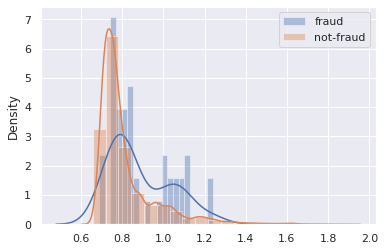

In [67]:
sns.distplot(positives_scores,label = 'fraud',bins = 20)
sns.distplot(negatives_scores,label = 'not-fraud',bins = 20)
plt.legend()

In [68]:
import io
import sklearn
from sklearn.datasets import dump_svmlight_file

In [98]:
buf = io.BytesIO()
sklearn.datasets.dump_svmlight_file(x_train,y_train,buf)
buf.seek(0);

In [71]:
from sagemaker.amazon.amazon_estimator import get_image_uri

In [72]:
container = get_image_uri(boto3.Session().region_name,'xgboost',repo_version = '0.90-2')

	get_image_uri(region, 'xgboost', '1.0-1').


In [73]:
container

'683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:0.90-2-cpu-py3'

In [74]:
from math import sqrt

In [79]:
scale_pos_weight = sqrt(np.count_nonzero(y_train == 0) / np.count_nonzero(y_train == 1))

In [80]:
scale_pos_weight

23.952494089221073

In [78]:
hyperparams = {
    "max_depth":5,
    "subsample":0.8,
    "num_round":100,
    "eta":0.2,
    "gamma":4,
    "min_child_weight":6,
    "silent":0,
    "objective":'binary:logistic',
    "eval_metric":'auc',
    "scale_pos_weight": scale_pos_weight
}

In [83]:
import sagemaker
session = sagemaker.Session()

In [84]:
session

In [86]:
clf = sagemaker.estimator.Estimator(
    image_name = container,
    role = 'arn:aws:iam::544433795559:role/service-role/AmazonSageMaker-ExecutionRole-20230426T180700',
    hyperparameters = hyperparams,
    train_instance_count = 1,
    train_instance_type = instance_type,
    sagemaker_session = session
)

In [99]:
key = 'fraud-dataset'
subdir = 'base'
prefix = 'fraud-classifier'
boto3.resource('s3',region_name = 'us-east-1').Bucket('sagemaker-us-east-1-544433795559').Object(os.path.join(prefix, 'train', subdir, key)).upload_fileobj(buf)

/usr/local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [100]:
s3_train_data = 's3://{}/{}/train/{}/{}'.format('sagemaker-us-east-1-544433795559', prefix, subdir, key)
print('Uploaded training data location: {}'.format(s3_train_data))

Uploaded training data location: s3://sagemaker-us-east-1-544433795559/fraud-classifier/train/base/fraud-dataset


In [101]:
output_location = 's3://{}/{}/output'.format('sagemaker-us-east-1-544433795559', prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-us-east-1-544433795559/fraud-classifier/output


In [102]:
clf.fit({'train':s3_train_data})

2023-04-27 02:06:39 Starting - Starting the training job...
2023-04-27 02:06:55 Starting - Preparing the instances for training......
2023-04-27 02:07:42 Downloading - Downloading input data...
2023-04-27 02:08:23 Training - Downloading the training image...
2023-04-27 02:08:58 Training - Training image download completed. Training in progress...INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter eval_metric value auc to Json.
Returning the value itself
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
[02:09:05] 256326x30 matrix with 7688153 entries loaded from /opt/ml/input/data/train
INFO:root:Single node training.
INFO:root:Train matrix has 256326 rows
[0]#011train-a

In [103]:
from sagemaker.predictor import csv_serializer

In [104]:
predictor = clf.deploy(initial_instance_count=1,
                       model_name="{}-xgb".format('vpendpoint'),
                       endpoint_name="{}-xgb".format('vpendpoint'),
                       instance_type=instance_type,
                       serializer=csv_serializer,
                       deserializer=None,
                       content_type='text/csv')

-----!

In [105]:
def predict(current_predictor, data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, current_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

In [106]:
raw_preds = predict(predictor, x_test)

In [108]:
raw_preds, raw_preds.shape

(array([9.99571383e-01, 2.03580726e-06, 5.68369724e-05, ...,
        3.15319153e-06, 2.97376596e-06, 5.72184354e-06]),
 (28481,))

In [109]:
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score

In [110]:
y_preds = np.where(raw_preds > 0.5,1,0)

In [111]:
y_preds

array([1, 0, 0, ..., 0, 0, 0])

In [112]:
balanced_accuracy_score(y_test,y_preds)

0.9021211611532022

In [113]:
cohen_kappa_score(y_test,y_preds)

0.860255159493083

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [115]:
def plot_confusion_matrix(y_true,y_predicted):
    cm = confusion_matrix(y_true,y_predicted)
    cm_norm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    ax = sns.heatmap(cm_norm,annot = cm,fmt = 'd')
    ax.set(xticklabels=["non-fraud", "fraud"], yticklabels=["non-fraud", "fraud"])
    ax.set_ylim([0,2])
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()

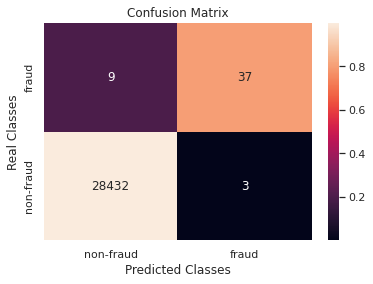

In [116]:
plot_confusion_matrix(y_test,y_preds)

In [117]:
from sklearn.metrics import classification_report

In [118]:
print(classification_report(y_test,y_preds,target_names = ['non-fraud','fraud']))

              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     28435
       fraud       0.93      0.80      0.86        46

    accuracy                           1.00     28481
   macro avg       0.96      0.90      0.93     28481
weighted avg       1.00      1.00      1.00     28481



## SMOTE (Synthetic Minority Oversampling)

In [119]:
from imblearn.over_sampling import SMOTE

In [120]:
smote = SMOTE(random_state = 42)

In [122]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [123]:
x_smote.shape, y_smote.shape

((511760, 30), (511760,))

In [124]:
from collections import Counter
print(sorted(Counter(y_smote).items()))

[(0.0, 255880), (1.0, 255880)]


In [125]:
smote_buf = io.BytesIO()

sklearn.datasets.dump_svmlight_file(x_smote, y_smote,smote_buf)
smote_buf.seek(0);

key = 'fraud-dataset-smote'
subdir = 'smote'
boto3.resource('s3',region_name = 'us-east-1').Bucket('sagemaker-us-east-1-544433795559').Object(os.path.join(prefix, 'train', subdir, key)).upload_fileobj(smote_buf)

/usr/local/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [126]:
s3_smote_train_data = 's3://{}/{}/train/{}/{}'.format('sagemaker-us-east-1-544433795559', prefix, subdir, key)
print('Uploaded training data location: {}'.format(s3_smote_train_data))

Uploaded training data location: s3://sagemaker-us-east-1-544433795559/fraud-classifier/train/smote/fraud-dataset-smote


In [127]:
smote_output_location = 's3://{}/{}/smote-output'.format('sagemaker-us-east-1-544433795559', prefix)
print('Training artifacts will be uploaded to: {}'.format(smote_output_location))

Training artifacts will be uploaded to: s3://sagemaker-us-east-1-544433795559/fraud-classifier/smote-output


In [128]:
hyperparams.pop("scale_pos_weight", None)

23.952494089221073

In [130]:
smote_xgb = sagemaker.estimator.Estimator(container,
                                        role='arn:aws:iam::544433795559:role/service-role/AmazonSageMaker-ExecutionRole-20230426T180700',
                                        hyperparameters=hyperparams,
                                        train_instance_count=1, 
                                        train_instance_type=instance_type,
                                        output_path=smote_output_location,
                                        sagemaker_session=session)

In [131]:
smote_xgb

In [132]:
smote_xgb.fit({'train': s3_smote_train_data})

2023-04-27 02:39:53 Starting - Starting the training job...
2023-04-27 02:40:09 Starting - Preparing the instances for training......
2023-04-27 02:41:15 Downloading - Downloading input data......
2023-04-27 02:41:55 Training - Downloading the training image..
2023-04-27 02:42:26 Training - Training image download completed. Training in progress.INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter eval_metric value auc to Json.
Returning the value itself
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
[02:42:33] 511760x30 matrix with 15349834 entries loaded from /opt/ml/input/data/train
INFO:root:Single node training.
INFO:root:Train matrix has 511760 rows
[0]#011train-

In [133]:
smote_predictor = smote_xgb.deploy(initial_instance_count=1,
                       model_name="{}-xgb-smote".format('vpendpoint'),
                       endpoint_name="{}-xgb-smote".format('vpendpoint'),
                       instance_type=instance_type)

# Specify input and output formats.
smote_predictor.content_type = 'text/csv'
smote_predictor.serializer = csv_serializer
smote_predictor.deserializer = None

-----!

In [135]:
smote_raw_preds = predict(smote_predictor, x_test)
smote_preds = np.where(smote_raw_preds > 0.5, 1, 0)

In [136]:
balanced_accuracy_score(y_test,smote_preds)

0.9125511272849596

In [138]:
cohen_kappa_score(y_test,smote_preds)

0.677958414473271

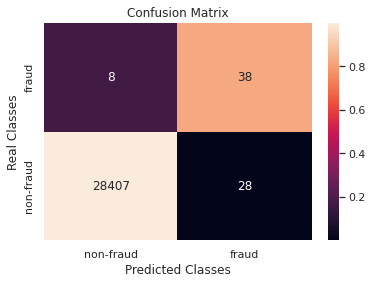

In [139]:
plot_confusion_matrix(y_test,smote_preds)

In [142]:
print(classification_report(y_test, smote_preds, target_names=['non-fraud', 'fraud']))

              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     28435
       fraud       0.58      0.83      0.68        46

    accuracy                           1.00     28481
   macro avg       0.79      0.91      0.84     28481
weighted avg       1.00      1.00      1.00     28481



In [144]:
for thres in np.linspace(0.1, 0.9, num=9):
    smote_thres_preds = np.where(smote_raw_preds > thres, 1, 0)
    print("Threshold: {:.1f}".format(thres))
    print("Balanced accuracy = {:.3f}".format(balanced_accuracy_score(y_test, smote_thres_preds)))
    print("Cohen's Kappa = {:.3f}\n".format(cohen_kappa_score(y_test, smote_thres_preds)))

Threshold: 0.1
Balanced accuracy = 0.922
Cohen's Kappa = 0.390

Threshold: 0.2
Balanced accuracy = 0.923
Cohen's Kappa = 0.533

Threshold: 0.3
Balanced accuracy = 0.923
Cohen's Kappa = 0.604

Threshold: 0.4
Balanced accuracy = 0.912
Cohen's Kappa = 0.660

Threshold: 0.5
Balanced accuracy = 0.913
Cohen's Kappa = 0.678

Threshold: 0.6
Balanced accuracy = 0.913
Cohen's Kappa = 0.745

Threshold: 0.7
Balanced accuracy = 0.902
Cohen's Kappa = 0.779

Threshold: 0.8
Balanced accuracy = 0.902
Cohen's Kappa = 0.813

Threshold: 0.9
Balanced accuracy = 0.902
Cohen's Kappa = 0.850

